In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from math import pi, sin, cos, exp
import math

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Clustering Problem

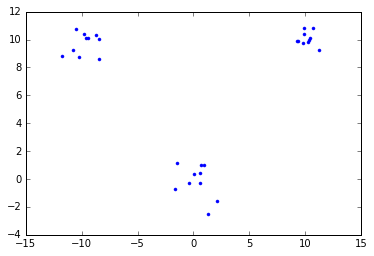

In [2]:
np.random.seed(99887766)
xs = np.random.randn(30,2)
xs[10:20,:] = xs[10:20,:]+[10,10]
xs[20:30,:] = xs[20:30,:]+[-10,10]
plt.plot(xs[:,0], xs[:, 1], '.b')
# print xs

# K-mean clustering
1) What is the underlying assumption for points to belong in the same cluster?

2) How do we measure the distance between two points?

3) Summarize update rule.

4) Let do it by hands. Suppose our data point are at

- [1, 0]
- [2, 1]
- [1, 1]

The guess for our centroids are at
- [0,0]
- [2,2]

Which point belongs to which centroid?

In [3]:
def calDistance(c, p):
    return sum((p - c)**2)*0.5

In [4]:
p = [[1, 0], [2, 1], [1, 1]]
c = [[0, 0], [2, 2]]

aps = [ np.array(x) for x in p ]
acs = [ np.array(x) for x in c ]

for ac in acs:
    for ap in aps:
        print ac, ap,
        print calDistance(ac, ap)

[0 0] [1 0] 0.5
[0 0] [2 1] 2.5
[0 0] [1 1] 1.0
[2 2] [1 0] 2.5
[2 2] [2 1] 0.5
[2 2] [1 1] 1.0


5) What should be our next guess for the centroid?

In [5]:
def classify(data, centroids):
    dataClass = np.zeros(len(data))
    dis = np.zeros((len(data), len(centroids)))
    
    for idx, d in enumerate(data):
        distances = [ calDistance(c, d) for c in centroids ]
        dataClass[idx] = np.argmin(distances)
    return dataClass

def k_mean(data, centroids):
    cc = centroids.copy()
    
    for i in xrange(100):
        dataClass = classify(data, centroids)
        centroids = [ np.mean(data[dataClass == idx], 0) for idx in xrange(len(centroids)) ]
    return centroids, dataClass

In [6]:
np.random.seed(100)
acs = np.array([ xs[x] for x in np.random.choice(30, 3) ])
centroids, dataClass = k_mean(xs, acs)

In [7]:
# rs = xs[dataClass == 0]
# gs = xs[dataClass == 1]
# bs = xs[dataClass == 2]

# plt.plot(rs[:,0], rs[:, 1], '.r')
# plt.plot(gs[:,0], gs[:, 1], '.g')
# plt.plot(bs[:,0], bs[:, 1], '.b')

def plot_classify(data, dataClass, centroids):
    xsClasses = [ data[dataClass == c] for c in xrange(len(centroids))]
    for idx, xsClass in enumerate(xsClasses):
        plt.plot(xsClass[:, 0], xsClass[:, 1], '.')
        plt.plot(centroids[idx][0], centroids[idx][1], 'ok')

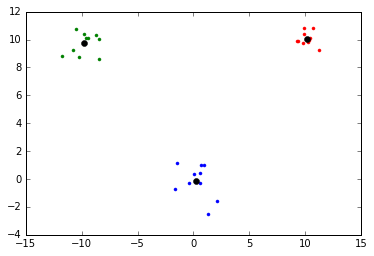

In [8]:
plot_classify(xs, dataClass, centroids)

6) How should we initialize the seed?
- What can go wrong if we seed it with the same centroid ([0,0], [0,0])
- What can go wrong if we seed it with ([0,0], [100,100])

How can we avoid these two things?

7) Implement K-mean and see how it works on the data

In [9]:
# implement

8) How does it work on this data? Why?

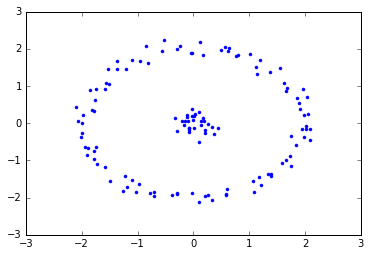

In [10]:
np.random.seed(9999)
ndata = 100
thetas = np.linspace(0,2*math.pi,ndata)
data1 = np.array([
    [2*cos(theta) for theta in thetas],
    [2*sin(theta) for theta in thetas]
])

data1 = data1 + np.random.randn(2, ndata)*0.1

data2 = np.random.randn(2, 30)*0.2

#plt.plot(data1[0], data1[1], '.')
#plt.plot(data2[0], data2[1], '.')

data = np.concatenate((data1, data2), axis=1)
sorted_data = data.copy().T
np.random.shuffle(data.T)


data = data.T
#print data
plt.plot(data[:, 0], data[:, 1],'.')

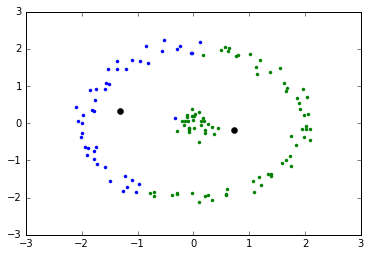

In [17]:
centroids, dataClass = k_mean(data, data[:2])
plot_classify(data, dataClass, centroids)

# When K Mean fails

1) We saw it break in the previous example. What really define a cluster?

2) How do we turn data point in to graph

3) Turn the data in to adjacency/affinity matrix $A$.

One of the thing you can use is

$$exp \left(\frac{-\left|\vec{x}_i - \vec{x}_j\right|^2}{\sigma^2}\right)$$

Pick $\sigma$ on the same scale as the plot shows


In [12]:
def calAdj(x1, x2):
    scaling = 1
    return np.exp( ( -calDistance(x1, x2)**2 )/ scaling**2)

In [13]:
def toMatrix(data):
    nData, nFeature = data.shape
    mat = np.zeros((nData, nData))
    for irow in xrange(nData):
        for icolumn in xrange(1, nData):
            mat[irow][icolumn] = 1 if irow == icolumn else np.array( calAdj(data[irow], data[icolumn]) )
#             mat[icolumn][irow] = mat[irow][icolumn]
    return mat + mat.T

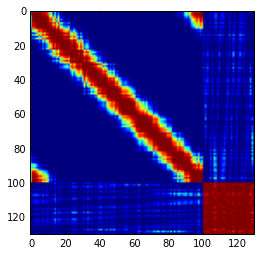

In [14]:
mat = toMatrix(sorted_data)
plt.imshow(mat)

4) Try K-mean on this and see what you got.

In [21]:
np.random.seed(999)
acs = np.array( [ mat[x] for x in np.random.choice(150, 2) ] )
centroids, dataClass = k_mean(mat, acs)

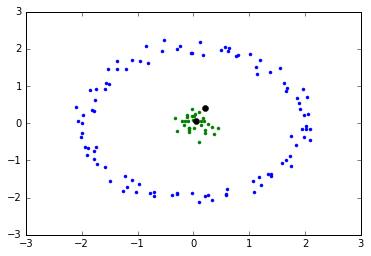

In [19]:
plot_classify(sorted_data, dataClass, centroids)

# Elbow Methods: Picking Number of Cluster

This is really an art not a science even human don't agree on number of clusters.

1) Write a function to compute cluster variance

In [284]:
def calScore(data, dataClass, centroids):
#     score = 0
#     for ic, c in enumerate(centroids):
#         for d in data[dataClass == ic]:
#             score += calDistance(d, c)
#     return score
    return sum([ calDistance(d, c) for ic, c in enumerate(centroids) for d in data[dataClass == ic]])

In [300]:
def elbow(data, mink, maxk):
    ret = []
    for k in xrange(mink, maxk):
        centroids, dataClass = k_mean(data, data[:k])
        score = calScore(data, dataClass, centroids)
        ret.append([k, score])
    return np.array(ret)

In [301]:
# centroids, dataClass = k_mean(xs, xs[:2])

In [302]:
# calScore(xs, dataClass, centroids)
e = elbow(xs, 1, 20)
print e

[[  1.00000000e+00   1.35040412e+03]
 [  2.00000000e+00   5.18433090e+02]
 [  3.00000000e+00   2.32105627e+01]
 [  4.00000000e+00   1.61077178e+01]
 [  5.00000000e+00   1.30076065e+01]
 [  6.00000000e+00   1.26824000e+01]
 [  7.00000000e+00   1.23175696e+01]
 [  8.00000000e+00   1.13502462e+01]
 [  9.00000000e+00   1.09201160e+01]
 [  1.00000000e+01   1.06036622e+01]
 [  1.10000000e+01   1.05875783e+01]
 [  1.20000000e+01   9.41224330e+00]
 [  1.30000000e+01   8.72446938e+00]
 [  1.40000000e+01   8.35067611e+00]
 [  1.50000000e+01   8.26849624e+00]
 [  1.60000000e+01   8.16935294e+00]
 [  1.70000000e+01   8.16315122e+00]
 [  1.80000000e+01   7.95258977e+00]
 [  1.90000000e+01   7.90782395e+00]]


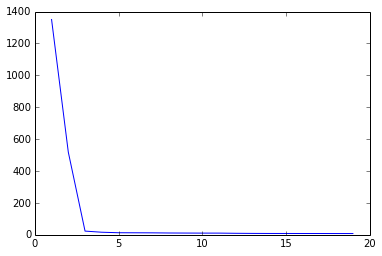

In [303]:
plt.plot(e[:, 0], e[:, 1])

2) Plot cluster variance vs number of cluster.

# Spectral Clustering... (PCA-ish) (If we have time. Not on Final. Too Technical.)

1) Even though the above method works. What's the problem with what we do above?

2) Intuition: Eigen Vector/Eigen Value for block diagonal.

In [14]:
a = np.array([
[2, -1, -1, 0, 0, 0, 0, 0, 0],
[-1, 2, -1, 0, 0, 0, 0, 0, 0],
[-1, -1, 2, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, -1, 0, 0, 0, 0],
[0, 0, 0, -1, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 3, -1, -1, -1],
[0, 0, 0, 0, 0, -1, 3, -1, -1],
[0, 0, 0, 0, 0, -1, -1, 3, -1],
[0, 0, 0, 0, 0, -1, -1, -1, 3],
], dtype=np.float64)
print a
#s = np.linalg.eigh(a)
#print s[0]
#print np.array_str(s[1], precision=1, max_line_width=100, suppress_small=True)

[[ 2. -1. -1.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [-1. -1.  2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  3. -1. -1. -1.]
 [ 0.  0.  0.  0.  0. -1.  3. -1. -1.]
 [ 0.  0.  0.  0.  0. -1. -1.  3. -1.]
 [ 0.  0.  0.  0.  0. -1. -1. -1.  3.]]


3) What if we switch the row?

In [ ]:
a = np.array([
[ 2, -1, -1,  0,  0,  0,  0,  0,  0],
[-1,  2, -1,  0,  0,  0,  0,  0,  0],
[-1, -1,  2,  0,  0,  0,  0,  0,  0],
[ 0,  0,  0,  1,  0, -1,  0,  0,  0],
[ 0,  0,  0,  0,  3,  0, -1, -1, -1],
[ 0,  0,  0,  -1, 0,  1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  0,  3, -1, -1],
[ 0,  0,  0,  0, -1,  0, -1,  3, -1],
[ 0,  0,  0,  0, -1,  0, -1, -1,  3],
], dtype=np.float64)
# print a
# s = np.linalg.eigh(a)
# print s[0]
# print s
# print np.array_str(s[1], precision=1, max_line_width=100, suppress_small=True)

4) Compute Degree Matrix $D$ whose diagonal element is the degree.

5) The block diagonal that we really want to find eigven vector is graph laplacian(This is really technical google this up). But the eigenvalue will be related minimum sum of cut weight needed to make it into disconnected component.

$$ L = D - A $$

6) Find the eigen vector/eigen value of $L$.

7) Project each of $A$ on to $L$. (Take the absolute of components too)

8) Do K mean on couple of projection of A and see what you got.